In [1]:
pip install -r reqs.txt 

Note: you may need to restart the kernel to use updated packages.


In [50]:
import cv2
import easyocr
import matplotlib.pyplot as plt

In [6]:
image_path = 'image_en 7.png'

img = cv2.imread(image_path)

In [7]:
reader = easyocr.Reader(['ru', 'en'], gpu=False)
#out = reader.readtext(img)

Using CPU. Note: This module is much faster with a GPU.


In [8]:
out = reader.readtext(img, decoder='beamsearch')

In [75]:
threshold = 0.3

In [147]:
import PIL
from PIL import Image
from PIL import ImageDraw
# png jpg
#im_ = PIL.Image.open('minitest\image_en 7.png')
im_ = PIL.Image.open('test\en\image_en 7.png')
#out = reader.readtext(im_)
#out = reader.readtext(im_, paragraph=True, y_ths = -0.1, x_ths=-0.1)
out = reader.readtext(im_, paragraph=True, y_ths = -0.1, x_ths=-0.1)


'''for t in out:
    print(t)'''

def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0,*p1,*p2,*p3,*p0], fill=color, width=width)
    return image

res_image = draw_boxes(im_, out)

res_image.save(r'result\res_image.png')

In [106]:
def combine_text_nearby(text_list, y_threshold, x_threshold):
    combined_text_list = []
    current_combined_text = text_list[0][1]
    current_bbox = text_list[0][0]

    for i in range(1, len(text_list)):
        bbox, text, score = text_list[i]

        if bbox[0][1] - current_bbox[2][1] < y_threshold and bbox[0][0] - current_bbox[2][0] < x_threshold:
            current_combined_text += ' ' + text
            current_bbox = [
                [min(current_bbox[0][0], bbox[0][0]), min(current_bbox[0][1], bbox[0][1])],
                [max(current_bbox[1][0], bbox[1][0]), min(current_bbox[1][1], bbox[1][1])],
                [max(current_bbox[2][0], bbox[2][0]), max(current_bbox[2][1], bbox[2][1])],
                [min(current_bbox[3][0], bbox[3][0]), max(current_bbox[3][1], bbox[3][1])]
            ]
        else:
            combined_text_list.append((current_combined_text, current_bbox))
            current_combined_text = text
            current_bbox = bbox

    # Append the last combined text
    combined_text_list.append((current_combined_text, current_bbox))

    return combined_text_list


In [107]:
y_threshold = 1
x_threshold = 1

combined_text_list = combine_text_nearby(out, y_threshold, x_threshold)

for t in combined_text_list:
    print(t)

('Dairy free couverture chocolale:', [[445, 123], [1203, 123], [1203, 203], [445, 203]])
('Portions per pack: 8 Ingredients: sugar; соcоя huller cocoa mass; ground tiger nuls; chicory fibre; Nutrition Iniormalion', [[427, 145], [1882, 145], [1882, 340], [427, 340]])
('I16', [[1968, 254], [2048, 254], [2048, 310], [1968, 310]])
('rice syrup powder; emulsilier', [[414, 312], [1077, 312], [1077, 397], [414, 397]])
('Energy', [[1332, 340], [1524, 340], [1524, 427], [1332, 427]])
('22I (sunflower lecithin), nalural vanilla 536 flavouring: Couventure chocolale Fat 3 conlains cocoa solids 35% minimum of Which salurales 1 contaln soya: Carbohydrale 4 of which sugars 4 Suitable for vegelarlans: Prolein 2 Suilable for vegans: Sall 0.', [[379, 327], [2048, 327], [2048, 845], [379, 845]])
('Slore In a cool;', [[377, 859], [737, 859], [737, 925], [377, 925]])
('place:', [[831, 867], [981, 867], [981, 935], [831, 935]])
('Relerence intake of an averac Маy dry', [[405.0370214010772, 576.0665540877558

In [108]:
sorted_boxes = sorted(out, key=lambda box: box[0][0][1])
sorted_boxes

[([[445, 123], [1203, 123], [1203, 203], [445, 203]],
  'Dairy free couverture chocolale:',
  0.6196753261803395),
 ([[1312, 145], [1795, 145], [1795, 234], [1312, 234]],
  'Portions per pack: 8',
  0.5486979628124783),
 ([[436, 190], [1292, 190], [1292, 269], [436, 269]],
  'Ingredients: sugar; соcоя huller cocoa',
  0.673785091210354),
 ([[1334, 240], [1882, 240], [1882, 314], [1334, 314]],
  'Nutrition Iniormalion',
  0.9677329090339789),
 ([[427, 254], [1272, 254], [1272, 340], [427, 340]],
  'mass; ground tiger nuls; chicory fibre;',
  0.68821522936542),
 ([[1968, 254], [2048, 254], [2048, 310], [1968, 310]],
  'I16',
  0.5344244881777978),
 ([[414, 312], [1077, 312], [1077, 397], [414, 397]],
  'rice syrup powder; emulsilier',
  0.7273302057369534),
 ([[1969, 327], [2048, 327], [2048, 387], [1969, 387]],
  '22I',
  0.378626352161838),
 ([[1332, 340], [1524, 340], [1524, 427], [1332, 427]],
  'Energy',
  0.9992760196328231),
 ([[1967, 377], [2048, 377], [2048, 439], [1967, 439]],


In [109]:
# Sort the bounding boxes based on the y-coordinate in ascending order

current_box = None
combined_text = []

# Iterate through the sorted list
for box in sorted_boxes:
    box_coords = box[0]
    box_text = box[1]

    if current_box is None:
        # Initialize the first bounding box
        current_box = box_coords
        current_text = box_text
    else:
        # Compare the y-coordinate difference and x-coordinate difference
        y_diff = abs(current_box[0][1] - box_coords[0][1])
        x_diff = abs(current_box[0][0] - box_coords[0][0])

        if y_diff < 10 and x_diff < 5:
            # Combine the text if the conditions are met
            current_text += " " + box_text
            current_box = box_coords
        else:
            # Store the combined text and its coordinates
            combined_text.append((current_box, current_text))
            current_box = box_coords
            current_text = box_text

# Add the last combined text
combined_text.append((current_box, current_text))

# Print the combined text and its coordinates
for text_box in combined_text:
    print(text_box)

([[445, 123], [1203, 123], [1203, 203], [445, 203]], 'Dairy free couverture chocolale:')
([[1312, 145], [1795, 145], [1795, 234], [1312, 234]], 'Portions per pack: 8')
([[436, 190], [1292, 190], [1292, 269], [436, 269]], 'Ingredients: sugar; соcоя huller cocoa')
([[1334, 240], [1882, 240], [1882, 314], [1334, 314]], 'Nutrition Iniormalion')
([[427, 254], [1272, 254], [1272, 340], [427, 340]], 'mass; ground tiger nuls; chicory fibre;')
([[1968, 254], [2048, 254], [2048, 310], [1968, 310]], 'I16')
([[414, 312], [1077, 312], [1077, 397], [414, 397]], 'rice syrup powder; emulsilier')
([[1969, 327], [2048, 327], [2048, 387], [1969, 387]], '22I')
([[1332, 340], [1524, 340], [1524, 427], [1332, 427]], 'Energy')
([[1967, 377], [2048, 377], [2048, 439], [1967, 439]], '536')
([[410, 380], [1193, 380], [1193, 464], [410, 464]], '(sunflower lecithin), nalural vanilla')
([[1337, 429], [1431, 429], [1431, 497], [1337, 497]], 'Fat')
([[398, 437], [1160, 437], [1160, 533], [398, 533]], 'flavouring: Co

In [151]:
import os

def rename_images_in_folder(folder_path, res_folder, dec='greedy', beamW=5):
    
    file_list = os.listdir(folder_path)
    image_files = [file for file in file_list]

    # Rename the image files
    for image_file in image_files:
        # Get the full path of the image file
        image_path = os.path.join(folder_path, image_file)

        open_im = cv2.imread(image_path)
        #print(res_folder[11:])

        #reader = easyocr.Reader(['ru', 'en'], gpu=False)
    
        #out = reader.readtext(open_im, decoder=dec, beamWidth=beamW, paragraph=True)
        out = reader.readtext(open_im, decoder=dec, beamWidth=beamW, paragraph=True, y_ths = -0.1, x_ths=-0.1)

        '''for t in out:
            print(t)'''

        im = PIL.Image.open(image_path)

        res_im = draw_boxes(im, out, color='green')

        #new_image_path = os.path.join(res_folder, image_file)
        new_image_path = fr'{res_folder}\{image_file}'
        print(new_image_path)
        
        res_im.save(new_image_path)
        #res_im.save(r'result\beamsearch_2\'' + f'{image_file}')

# Usage example
folder_path = r"test_dataset\ru"

res_folder = r'result\tesst_ru'

#dec = 'beamsearch'

'''for beamW in [2,7,10]:
    print(beamW, '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    rename_images_in_folder(folder_path, fr'result\beamsearch\{dec}_{beamW}', dec, beamW)
'''
rename_images_in_folder(folder_path, res_folder)

result\tesst_ru\image_rus 1.png
result\tesst_ru\image_rus 10.png
result\tesst_ru\image_rus 2.png
result\tesst_ru\image_rus 3.png
result\tesst_ru\image_rus 4.png
result\tesst_ru\image_rus 5.png
result\tesst_ru\image_rus 6.png
result\tesst_ru\image_rus 7.png
result\tesst_ru\image_rus 8.png
result\tesst_ru\image_rus 9.png


In [76]:
for t in out:
    print(t)

    bbox, text, score = t 

    if score > threshold:
        cv2.rectangle(img, [round(x) for x in bbox[0]], [round(x) for x in bbox[2]], (0, 255, 0), 3)
    else:
        print(text)

([[0, 0], [58, 0], [58, 22], [0, 22]], 'аИДЫ', 0.6963003277778625)
([[70, 0], [361, 0], [361, 27], [70, 27]], 'пигМентелген какты кетредi', 0.3515538167608804)
([[0, 17], [427, 17], [427, 57], [0, 57]], 'ORIF NANO FLUORIDLI DiS MOCUNU MM', 0.4060090994877886)
([[170, 71], [416, 71], [416, 100], [170, 100]], 'Состав / Склад / Курамы |', 0.7099093151010065)
([[118, 96], [464, 96], [464, 128], [118, 128]], 'ТЭRKIBI / Найрлага / 8эбьо8эб0о,:', 0.20833147653971987)
ТЭRKIBI / Найрлага / 8эбьо8эб0о,:
([[61, 121], [512, 121], [512, 164], [61, 164]], 'Glycerin; Hydraled Silica; Sodium Hexamelaplmsplde', 0.39598211191336313)
([[0, 144], [32, 144], [32, 174], [0, 174]], '521', 0.5855995416641235)
([[60, 151], [513, 151], [513, 190], [60, 190]], 'Propylene Glycol; PEG-6; Aqua; Zinc Lactalg; Cl 77891,', 0.5565044922695835)
([[0, 176], [42, 176], [42, 208], [0, 208]], 'раy;', 0.4218444228172302)
([[59, 180], [520, 180], [520, 221], [59, 221]], 'Sodium Laulyl Sulfale; Aroma; Sudium Glltomae;|', 0.309

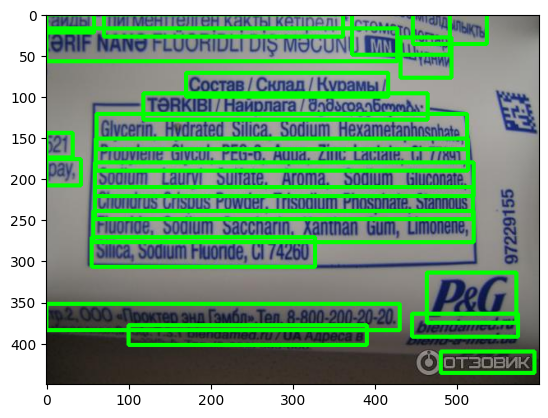

In [74]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.imshow(img)
plt.show()

[([[0, 0], [58, 0], [58, 22], [0, 22]], 'ramnbl', 0.1452358701055327), ([[70, 0], [361, 0], [361, 27], [70, 27]], 'nhrMehtrerreh KakTbl Ketipeni', 0.22879573977334342), ([[0, 17], [427, 17], [427, 57], [0, 57]], 'ORIF NANa FLUORIDLI Dis MOCUNU WN', 0.4478553225818734), ([[170, 71], [416, 71], [416, 100], [170, 100]], 'CocraB / Cian / Kypambl /', 0.47020547252691663), ([[118, 96], [464, 96], [464, 128], [118, 128]], 'TORKIBI / Haipnara / 8388083b02068:', 0.16312344708319285), ([[61, 121], [512, 121], [512, 164], [61, 164]], 'Glycerin; Hydrated Silica, Sodium Hexametaphosphate ,', 0.5000289974942351), ([[0, 144], [32, 144], [32, 174], [0, 174]], '521', 0.985217990949894), ([[60, 151], [513, 151], [513, 190], [60, 190]], 'Propylene Glycol; PEG-6, Aqua, Zinc Lactate;, CI 77891,', 0.26596003826338255), ([[0, 176], [42, 176], [42, 208], [0, 208]], 'pay;', 0.9988070130348206), ([[59, 180], [520, 180], [520, 221], [59, 221]], 'Sodium   Lauryl   Sulfate ,   Aroma,   Sodium   Gluconate,|', 0.284